>**Импортируем начальные данные, немного их подправляем и берем нужное**

Исходя из условия задачи, нам нужны только данные для бронирований из Португалии, поэтому выберем только их

Также выделим целевые значения, поменяем string-овые значения на численные и зададим для данных тип 'float'



In [ ]:
import pandas as pd

table = pd.read_csv('booking.csv', sep=";")
df = table.loc[table['country'] == 'PRT']
target = df['is_canceled']
df = df.drop(['is_canceled', 'country'], axis = 1)
df = df.replace({'reserved_room_type' : { 'A': 1, 'D' : 2, 'E' : 3, 'G' : 4, 'F': 5, 'C': 6, 'B': 7, 'H': 8, 'L': 9, 'P' : 10},
                'customer_type': {'Transient': 1, 'Transient-Party' : 2, 'Contract' : 3, 'Group' : 4},
                'deposit_type' : {'No Deposit' : 1, 'Non Refund' : 2, 'Refundable' : 3}})
df = df.astype('float')
target = target.astype('float')



>**Разделим данные на обучающую и тестовую выборки**

Делить будем в соотношении 78:22, поскольку именно на таком соотношении удалось добиться наибольшей точности итогового классификатора


Также заполним недостающие ячейки и нормируем полученные данные


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_train, data_test, target_train, target_test = train_test_split(df, target , test_size=0.22)
data_train = data_train.fillna(data_train.mean())
data_test = data_test.fillna(data_test.mean())

scaler_train = StandardScaler()
data_train = scaler_train.fit_transform(data_train)

scaler_test = StandardScaler()
data_test = scaler_test.fit_transform(data_test)




>**Почему я выбрал модель XGBoost**

*   В ходе работы XGBoost продемонстрировал наилучшие показатели в рамках точности классификации среди других моделей, таких как логистическая регрессия, метод опорных векторов и наивный байесовский классификатор
*   XGBoost является хорошим вариантом в рамках производительности и оптимизации вычислений  







>**Импортируем XGBoost и применяем его к обучающей и тестовой выборкам**



In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(data_train, target_train)
target_pred = xgb_model.predict(data_test).round()
target_pred

[13:15:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


array([1., 1., 0., ..., 1., 1., 1.], dtype=float32)



>**Оценим точность полученного классификатора**


Построим матрицу ошибок и вычислим точность классификации



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

confusion_matrix = confusion_matrix(target_test, target_pred)
print('Матрица ошибок:')
print(confusion_matrix)
print('Точность: {0:0.2f}'. format(metrics.accuracy_score(target_test, target_pred)))

Матрица ошибок:
[[3999  700]
 [ 902 5089]]
Точность: 0.85




>**Вторая часть 2-го задания**


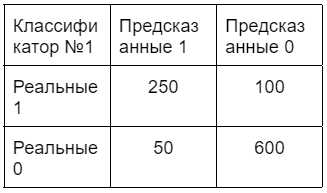
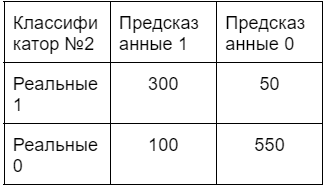

Здесь мы видим две матрицы ошибок для двух классификаторов

Для каждого из классификаторов рассчитаем :


1.   Точность измерений (accuracy) по формуле **(TP + TN) / (TP + FP + TN + FN)**
2.   Точность результата измерений (precision) по формуле **TP / (TP + FP)**
3.   Полноту (recall) по формуле **TP / (TP + FN)**
4.   F-меру по формуле **2 * (Precision * Recall) / (Precision + Recall)**

При этом значения TP, TN, FP, FN - это:


*   TP — истино-положительное решение
*   TN — истино-отрицательное решение
*   FP — ложно-положительное решение
*   FN — ложно-отрицательное решение

Располагаются эти значения в матрице ошибок следующим образом:

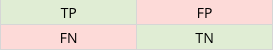

In [ ]:
TP_1 = 250
FP_1 = 100
FN_1 = 50
TN_1 = 600

TP_2 = 300
FP_2 = 50
FN_2 = 100
TN_2 = 550

acc_1 = (TP_1 + TN_1)/(TP_1 + FP_1 + TN_1 + FN_1)
prec_1 = TP_1/(TP_1 + FP_1)
rec_1 = TP_1/(TP_1 + FN_1)
f_1 = 2*(prec_1 * rec_1)/(prec_1 + rec_1)

print('Точность измерений 1: {0:0.2f}'. format(acc_1))
print('Точность результата измерений 1: {0:0.2f}'. format(prec_1))
print('Полнота 1: {0:0.2f}'. format(rec_1))
print('F-мера 1: {0:0.2f}'. format(f_1))

acc_2 = (TP_2 + TN_2)/(TP_2 + FP_2 + TN_2 + FN_2)
prec_2 = TP_2/(TP_2 + FP_2)
rec_2 = TP_2/(TP_2 + FN_2)
f_2 = 2*(prec_2 * rec_2)/(prec_2 + rec_2)

print('Точность измерений 2: {0:0.2f}'. format(acc_2))
print('Точность результата измерений 2: {0:0.2f}'. format(prec_2))
print('Полнота 2: {0:0.2f}'. format(rec_2))
print('F-мера 2: {0:0.2f}'. format(f_2))

Точность измерений 1: 0.85
Точность результата измерений 1: 0.71
Полнота 1: 0.83
F-мера 1: 0.77
Точность измерений 2: 0.85
Точность результата измерений 2: 0.86
Полнота 2: 0.75
F-мера 2: 0.80




> **Выводы**


Исходя из полученных результатов, мы видим, что первый классификатор превосходит второй в рамках полноты, в то время как первый превосходит второй в рамках точности результата измерений, точность измерений у первого и второго классификатора равны

Однако, F-мера у второго классификатора больше, пусть и не так значительно, значит, при выборе стоит предпочесть **второй классификатор**



